In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
! wget -O auto_claims_fraud.txt https://drive.usercontent.google.com/download?id=1DAco_ivl72XpQ_iH8O21ZjunTPUpqWOK&export=download&authuser=0&confirm=t&uuid=f70bc535-33b4-447b-b904-b629c7d123f1&at=APZUnTVEhgB04cBxW7Mbz-OO2DNN:1703780090526

--2023-12-30 13:13:09--  https://drive.usercontent.google.com/download?id=1DAco_ivl72XpQ_iH8O21ZjunTPUpqWOK
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3693324 (3.5M) [application/octet-stream]
Saving to: ‘auto_claims_fraud.txt’

auto_claims_fraud.t 100%[===================>]   3.52M  --.-KB/s    in 0.03s   

2023-12-30 13:13:10 (117 MB/s) - ‘auto_claims_fraud.txt’ saved [3693324/3693324]



In [154]:
import numpy as np
import pandas as pd

In [155]:
df = pd.read_csv("auto_claims_fraud.txt", sep="\t")
df

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
0           3 years          26 to 30                No             No   
1           6 years          31 to 35               Yes             No   
2           7 years          41 to 50                No             No   
3       more than 7          51 to 65               Yes             No   
4           5 years          31 to 35                No             No   
...             ...               ...               ...            ...   
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  \
0      External                none               1 year        3 to 4  1994   
1      External                none            no change     1 vehicle  1994   
2      External                none            no change     1 vehicle  1994   
3      External         more than 5            no change     1 vehicle  1994   
4      External                none            no change     1 vehicle  1994   
...         ...                 ...                  ...           ...   ...   
15415  External                none            no change     1 vehicle  1996   
15416  External         more than 5            no change        3 to 4  1996   
15417  External              1 to 2            no change     1 vehicle  1996   
15418  External         more than 5            no change     1 vehicle  1996   
15419  External              1 to 2            no change     1 vehicle  1996   

       BasePolicy  
0       Liability  
1       Collision  
2       Collision  
3       Liability  
4       Collision  
...           ...  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[15420 rows x 33 columns]

# Preprocessing

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound            15420 non-null

## Map Ordinal Features

In [157]:
def chech_uniqe (data_f):
    for col in data_f.columns:
        yield(col, np.unique(data_f[col], return_counts=True))
    yield("tamam")

cu = chech_uniqe(df)

In [158]:
cu.__next__()

('Month',
 (array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
         'Nov', 'Oct', 'Sep'], dtype=object),
  array([1280, 1127, 1285, 1266, 1411, 1257, 1321, 1360, 1367, 1201, 1305,
         1240])))

In [159]:
df['NumberOfCars'] = df['NumberOfCars'].map(
    {
        '1 vehicle': 1,
        '2 vehicles': 2,
        '3 to 4': 3,
        '5 to 8': 4,
        'more than 8': 5,
    }
)

In [160]:
df['AddressChange-Claim'] = df['AddressChange-Claim'].map(
    {
        'under 6 months': 0,
        '1 year': 1,
        '2 to 3 years': 2,
        '4 to 8 years': 3,
        'no change': 4,
    }
)

In [161]:
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(
    {
        'none': 0,
        '1 to 2': 1,
        '3 to 5': 2,
        'more than 5': 3,
    }
)

In [162]:
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(
    {
        '16 to 17': 0,
        '18 to 20': 1,
        '21 to 25': 2,
        '26 to 30': 3,
        '31 to 35': 4,
        '36 to 40': 5,
        '41 to 50': 6,
        '51 to 65': 7,
        'over 65': 8,
    }
)

In [163]:
df['AgeOfVehicle'] = df['AgeOfVehicle'].map(
    {
        'new': 0,
        '2 years': 1,
        '3 years': 2,
        '4 years': 3,
        '5 years': 4,
        '6 years': 5,
        '7 years': 6,
        'more than 7': 7,
    }
)

In [164]:
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(
    {
        'none': 0,
        '1': 1,
        '2 to 4': 2,
        'more than 4': 3,
    }
)

In [165]:
df['Days:Policy-Claim'] = df['Days:Policy-Claim'].map(
    {
        'none': 0,
        '8 to 15': 1,
        '15 to 30': 3,
        'more than 30': 4,
    }
)

In [166]:
df['Days:Policy-Accident'] = df['Days:Policy-Accident'].map(
    {
        'none': 0,
        '1 to 7': 1,
        '8 to 15': 2,
        '15 to 30': 3,
        'more than 30': 4,
    }
)

In [167]:
df['VehiclePrice'] = df['VehiclePrice'].map(
    {
        'less than 20,000': 0,
        '20,000 to 29,000': 1,
        '30,000 to 39,000': 2,
        '40,000 to 59,000': 3,
        '60,000 to 69,000': 4,
        'more than 69,000': 5,
    }
)

In [168]:
# df['MonthClaimed'] = df['MonthClaimed'].map(
#     {
#         '0': 0,
#         'Jan': 1,
#         'Feb': 2,
#         'Mar': 3,
#         'Apr': 4,
#         'May': 5,
#         'Jun': 6,
#         'Jul': 7,
#         'Aug': 8,
#         'Sep': 9,
#         'Oct': 10,
#         'Nov': 11,
#         'Dec': 12,
#     }
# )

In [169]:
# df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(
#     {
#         '0': 0,
#         'Monday': 1,
#         'Tuesday': 2,
#         'Wednesday': 3,
#         'Thursday': 4,
#         'Friday': 5,
#         'Saturday': 6,
#         'Sunday': 7,
#     }
# )

In [170]:
# df['DayOfWeek'] = df['DayOfWeek'].map(
#     {
#         'Monday': 1,
#         'Tuesday': 2,
#         'Wednesday': 3,
#         'Thursday': 4,
#         'Friday': 5,
#         'Saturday': 6,
#         'Sunday': 7,
#     }
# )

In [171]:
# df['Month'] = df['Month'].map(
#     {
#         'Jan': 1,
#         'Feb': 2,
#         'Mar': 3,
#         'Apr': 4,
#         'May': 5,
#         'Jun': 6,
#         'Jul': 7,
#         'Aug': 8,
#         'Sep': 9,
#         'Oct': 10,
#         'Nov': 11,
#         'Dec': 12,
#     }
# )

## Extract Target

In [172]:
label = np.asarray(df['FraudFound'])
df.drop('FraudFound', axis=1, inplace=True)
df.drop('PolicyNumber', axis=1, inplace=True) # index again

In [173]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

## Find Correlated Features

In [174]:
df.corr()

<ipython-input-174-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


WeekOfMonth  WeekOfMonthClaimed       Age  VehiclePrice  \
WeekOfMonth              1.000000            0.275400 -0.004810     -0.003549   
WeekOfMonthClaimed       0.275400            1.000000  0.001859     -0.006074   
Age                     -0.004810            0.001859  1.000000     -0.088582   
VehiclePrice            -0.003549           -0.006074 -0.088582      1.000000   
RepNumber                0.005283            0.008908 -0.007063      0.013487   
Deductible              -0.003993            0.005457  0.069420     -0.005602   
DriverRating            -0.016817           -0.000048  0.001668     -0.002743   
Days:Policy-Accident    -0.033609            0.012265  0.011674      0.003951   
Days:Policy-Claim       -0.017844            0.006092  0.006376     -0.000719   
PastNumberOfClaims      -0.003523            0.014743 -0.027648      0.041829   
AgeOfVehicle            -0.010695            0.001311  0.688435     -0.161756   
AgeOfPolicyHolder       -0.002758            0.001397  0.971634     -0.117934   
NumberOfSuppliments      0.000995            0.012062  0.090090      0.004437   
AddressChange-Claim      0.008894           -0.007266  0.005821      0.009129   
NumberOfCars             0.002521            0.008246 -0.001405     -0.012807   
Year                    -0.003906            0.012175  0.025197     -0.032719   

                      RepNumber  Deductible  DriverRating  \
WeekOfMonth            0.005283   -0.003993     -0.016817   
WeekOfMonthClaimed     0.008908    0.005457     -0.000048   
Age                   -0.007063    0.069420      0.001668   
VehiclePrice           0.013487   -0.005602     -0.002743   
RepNumber              1.000000    0.000509      0.011031   
Deductible             0.000509    1.000000      0.003886   
DriverRating           0.011031    0.003886      1.000000   
Days:Policy-Accident  -0.004361    0.007956      0.004932   
Days:Policy-Claim      0.008191    0.006223      0.002231   
PastNumberOfClaims     0.001346    0.002162     -0.006094   
AgeOfVehicle          -0.005915    0.095132     -0.002426   
AgeOfPolicyHolder     -0.006923    0.074889      0.001045   
NumberOfSuppliments    0.003152    0.007995      0.003060   
AddressChange-Claim   -0.007981   -0.149173     -0.004291   
NumberOfCars          -0.010975    0.000226      0.011419   
Year                   0.009338   -0.001170     -0.013890   

                      Days:Policy-Accident  Days:Policy-Claim  \
WeekOfMonth                      -0.033609          -0.017844   
WeekOfMonthClaimed                0.012265           0.006092   
Age                               0.011674           0.006376   
VehiclePrice                      0.003951          -0.000719   
RepNumber                        -0.004361           0.008191   
Deductible                        0.007956           0.006223   
DriverRating                      0.004932           0.002231   
Days:Policy-Accident              1.000000           0.498346   
Days:Policy-Claim                 0.498346           1.000000   
PastNumberOfClaims                0.045084           0.038596   
AgeOfVehicle                      0.014735           0.017309   
AgeOfPolicyHolder                 0.008681           0.007407   
NumberOfSuppliments               0.079049           0.053404   
AddressChange-Claim               0.010715          -0.002054   
NumberOfCars                     -0.000822          -0.008913   
Year                             -0.005701          -0.003994   

                      PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  \
WeekOfMonth                    -0.003523     -0.010695          -0.002758   
WeekOfMonthClaimed              0.014743      0.001311           0.001397   
Age                            -0.027648      0.688435           0.971634   
VehiclePrice                    0.041829     -0.161756          -0.117934   
RepNumber                       0.001346     -0.005915          -0.006923   
Deductible                      0.0021

In [175]:
ones_frame = np.ones(df.corr().shape)
lower_triangle = np.tril(ones_frame, k=-1).T
lower = df.corr().where(lower_triangle.astype('bool'))
to_drop = []
for column in lower.columns:

    if any(lower[column]  > 0.8 ):
        to_drop.append(column)

# ones_frame = np.ones(df.corr().shape)
# lower_triangle = np.tril(ones_frame, k=-1)
# lower = df.corr().where(lower_triangle.astype('bool'))

for column in lower.columns:
    if any(lower[column]  < -0.8 ):
        to_drop.append(column)

print()
print("columns to drop: ", to_drop)
print()


columns to drop:  ['AgeOfPolicyHolder']



<ipython-input-175-f45ffe05dc19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ones_frame = np.ones(df.corr().shape)
<ipython-input-175-f45ffe05dc19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower = df.corr().where(lower_triangle.astype('bool'))


In [176]:
df.drop('AgeOfPolicyHolder', axis=1, inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  int64 
 15  RepNumber             15420 non-null

In [178]:
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  VehiclePrice  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      1.796109   
std        1.287585            1.259115     13.492377      1.443017   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      1.000000   
50%        3.000000            3.000000     38.000000      1.000000   
75%        4.000000            4.000000     48.000000      2.000000   
max        5.000000            5.000000     80.000000      5.000000   

          RepNumber    Deductible  DriverRating  Days:Policy-Accident  \
count  15420.000000  15420.000000  15420.000000          15420.000000   
mean       8.483268    407.704280      2.487808              3.972698   
std        4.599948     43.950998      1.119453              0.286260   
min        1.000000    300.000000      1.000000              0.000000   
25%        5.000000    400.000000      1.000000              4.000000   
50%        8.000000    400.000000      2.000000              4.000000   
75%       12.000000    400.000000      3.000000              4.000000   
max       16.000000    700.000000      4.000000              4.000000   

       Days:Policy-Claim  PastNumberOfClaims  AgeOfVehicle  \
count       15420.000000        15420.000000  15420.000000   
mean            3.992023            1.334176      5.605772   
std             0.129860            1.023588      1.399658   
min             0.000000            0.000000      0.000000   
25%             4.000000            0.000000      5.000000   
50%             4.000000            1.000000      6.000000   
75%             4.000000            2.000000      7.000000   
max             4.000000            3.000000      7.000000   

       NumberOfSuppliments  AddressChange-Claim  NumberOfCars          Year  
count         15420.000000         15420.000000  15420.000000  15420.000000  
mean              1.175357             3.887224      1.098833   1994.866472  
std               1.249109             0.455054      0.383472      0.803313  
min               0.000000             0.000000      1.000000   1994.000000  
25%               0.000000             4.000000      1.000000   1994.000000  
50%               1.000000             4.000000      1.000000   1995.000000  
75%               3.000000             4.000000      1.000000   1996.000000  
max               3.000000             4.000000      5.000000   1996.000000

In [179]:
df.isna().mean().sort_values()

Month                   0.0
NumberOfCars            0.0
AddressChange-Claim     0.0
NumberOfSuppliments     0.0
AgentType               0.0
WitnessPresent          0.0
PoliceReportFiled       0.0
AgeOfVehicle            0.0
PastNumberOfClaims      0.0
Days:Policy-Claim       0.0
Days:Policy-Accident    0.0
DriverRating            0.0
Deductible              0.0
RepNumber               0.0
VehiclePrice            0.0
VehicleCategory         0.0
PolicyType              0.0
Fault                   0.0
Age                     0.0
MaritalStatus           0.0
Sex                     0.0
WeekOfMonthClaimed      0.0
MonthClaimed            0.0
DayOfWeekClaimed        0.0
AccidentArea            0.0
Make                    0.0
DayOfWeek               0.0
WeekOfMonth             0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

## Train Test Split

In [180]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=0, stratify = label)
# X_train.reset_index(drop=True, inplace = True)
# X_test.reset_index(drop=True, inplace = True)

In [181]:
# X_train

## Standard Scaler

In [182]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train.select_dtypes(['number']))
# X_train[X_train.select_dtypes(['number']).columns] = scaler.transform(X_train.select_dtypes(['number']))
# X_test[X_test.select_dtypes(['number']).columns] = scaler.transform(X_test.select_dtypes(['number']))

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.select_dtypes(['number']))
df[df.select_dtypes(['number']).columns] = scaler.transform(df.select_dtypes(['number']))

## One Hot Encoder

In [184]:
from sklearn import preprocessing

def onehotencoder (df):
    # creating instance of one-hot-encoder
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse = False)
    # passing bridge-types-cat column (label encoded values of bridge_types)
    onehotencoder_data = enc.fit_transform(df.select_dtypes(['object', 'category']))

    list_columns_name = []
    for i in range(len(onehotencoder_data[0])):
        list_columns_name.append('Type '+ str(i+1))
    enc_df = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)

    # merge with main df bridge_df on key values
    df = df.join(enc_df)
    for col in df.select_dtypes(['object', 'category']).columns:
        df.drop(col, axis=1, inplace=True)

    return (df, enc)

In [185]:
# def test_onehotencoder (X_test, enc):

#     onehotencoder_data = enc.transform(X_test.select_dtypes(['object', 'category']))

#     list_columns_name = []
#     for i in range(len(onehotencoder_data[0])):
#         list_columns_name.append('Type '+ str(i+1))
#     enc_test = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)

#     X_test = X_test.join(enc_test)
#     for col in X_test.select_dtypes(['object', 'category']).columns:
#         X_test.drop(col, axis=1, inplace=True)

#     return(X_test)

In [186]:
data_frame, encoder = onehotencoder(df)
data_frame

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


WeekOfMonth  WeekOfMonthClaimed       Age  VehiclePrice  RepNumber  \
0         1.717545           -1.345408 -1.397554      2.220344   0.764540   
1         0.164199            1.037295 -0.434015      2.220344   1.416743   
2         1.717545           -0.551174  0.529523      2.220344  -0.322464   
3        -0.612473           -1.345408  1.863653     -0.551715  -0.974666   
4         1.717545           -0.551174 -0.952844      2.220344  -1.192067   
...            ...                 ...       ...           ...        ...   
15415     0.940872            1.831529 -0.359897     -0.551715  -0.757265   
15416     1.717545           -1.345408 -0.730489      0.141300   0.547139   
15417     1.717545           -1.345408 -1.175199     -0.551715  -0.974666   
15418    -1.389146           -0.551174 -0.434015     -0.551715  -0.539865   
15419    -0.612473            0.243060 -1.397554     -0.551715  -1.192067   

       Deductible  DriverRating  Days:Policy-Accident  Days:Policy-Claim  \
0       -2.450633     -1.329092              0.095379           0.061427   
1       -0.175298      1.350875              0.095379           0.061427   
2       -0.175298      0.457553              0.095379           0.061427   
3       -0.175298     -0.435770              0.095379           0.061427   
4       -0.175298     -1.329092              0.095379           0.061427   
...           ...           ...                   ...                ...   
15415   -0.175298      1.350875              0.095379           0.061427   
15416   -0.175298      0.457553              0.095379           0.061427   
15417   -0.175298      1.350875              0.095379           0.061427   
15418   -0.175298      1.350875              0.095379           0.061427   
15419   -0.175298      1.350875              0.095379           0.061427   

       PastNumberOfClaims  ...  Type 81  Type 82  Type 83  Type 84  Type 85  \
0               -1.303473  ...      0.0      1.0      0.0      1.0      0.0   
1               -1.303473  ...      0.0      0.0      1.0      1.0      0.0   
2               -0.326486  ...      0.0      1.0      0.0      1.0      0.0   
3               -0.326486  ...      0.0      0.0      1.0      1.0      0.0   
4               -1.303473  ...      0.0      1.0      0.0      1.0      0.0   
...                   ...  ...      ...      ...      ...      ...      ...   
15415            0.650501  ...      0.0      1.0      0.0      1.0      0.0   
15416            1.627488  ...      0.0      1.0      0.0      1.0      0.0   
15417            1.627488  ...      0.0      1.0      0.0      1.0      0.0   
15418           -1.303473  ...      0.0      1.0      0.0      1.0      0.0   
15419           -1.303473  ...      0.0      1.0      0.0      1.0      0.0   

       Type 86  Type 87  Type 88  Type 89  Type 90  
0          1.0      0.0      0.0      0.0      1.0  
1          1.0      0.0      0.0      1.0      0.0  
2          1.0      0.0      0.0      1.0      0.0  
3          1.0      0.0      0.0      0.0      1.0  
4          1.0      0.0      0.0      1.0      0.0  
...        ...      ...      ...      ...      ...  
15415      1.0      0.0      0.0      1.0      0.0  
15416      1.0      0.0      0.0      0.0      1.0  
15417      1.0      0.0      0.0      1.0      0.0  
15418      1.0      0.0      1.0      0.0      0.0  
15419      1.0      0.0      0.0      1.0      0.0  

[15420 rows x 105 columns]

In [187]:
# X_test = test_onehotencoder (X_test, encoder)
# X_test

## Reduce Data with Selection

In [188]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold= 0.1)
sel.fit(data_frame)

VarianceThreshold(threshold=0.1)

In [189]:
selected_data = sel.transform(data_frame)
selected_data.shape

(15420, 45)

## Reduce Data with Extraction

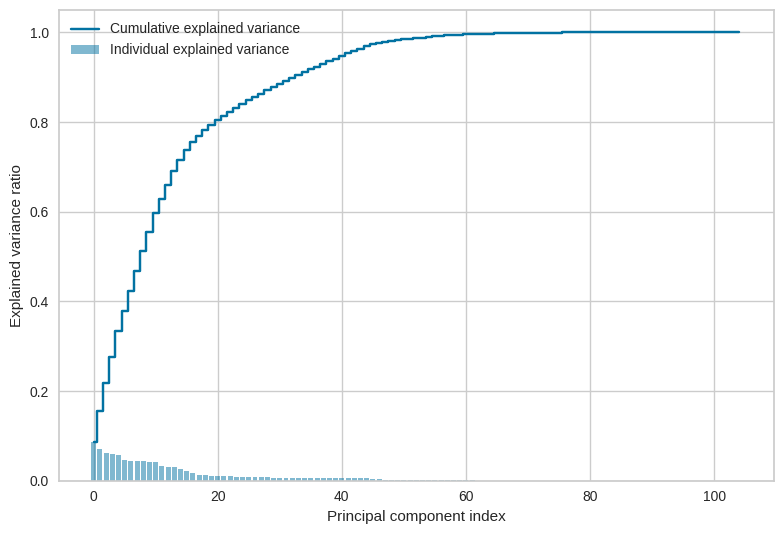

(15420, 105)

In [190]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
data_frame_pca = pca.fit_transform(data_frame)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

reducted_data = np.copy(data_frame_pca) # [:,:3]
reducted_data.shape


# Clustring Methods

In [191]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [192]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K-Means

In [211]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

number_of_cluster = 2
# number_of_cluster = 5
# number_of_cluster = 8

## Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

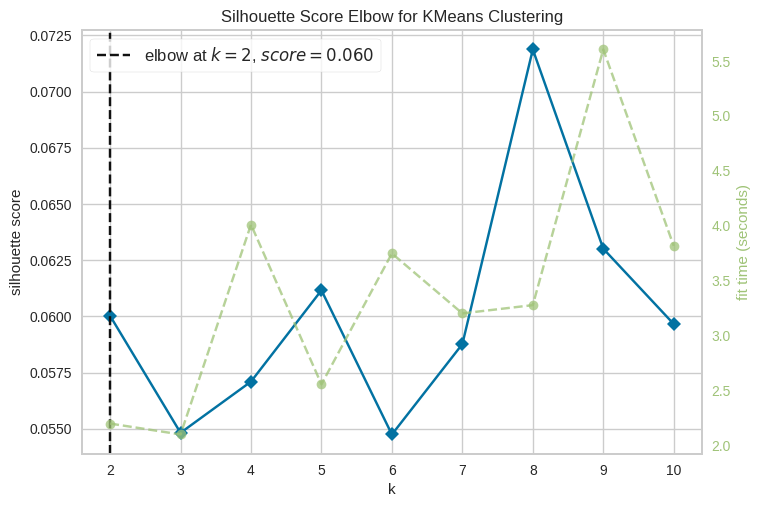

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette'
)

visualizer.fit(data_frame) # Fit the data to the visualizer
visualizer.show()       # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

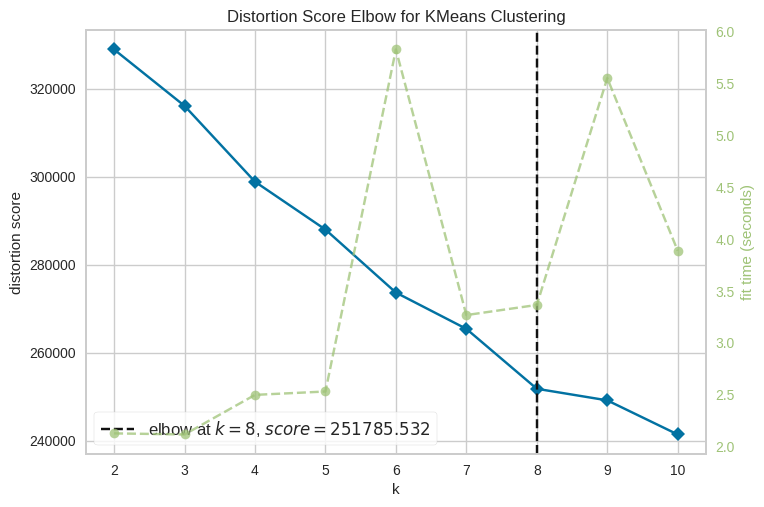

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='distortion'
)

visualizer.fit(data_frame) # Fit the data to the visualizer
visualizer.show()       # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

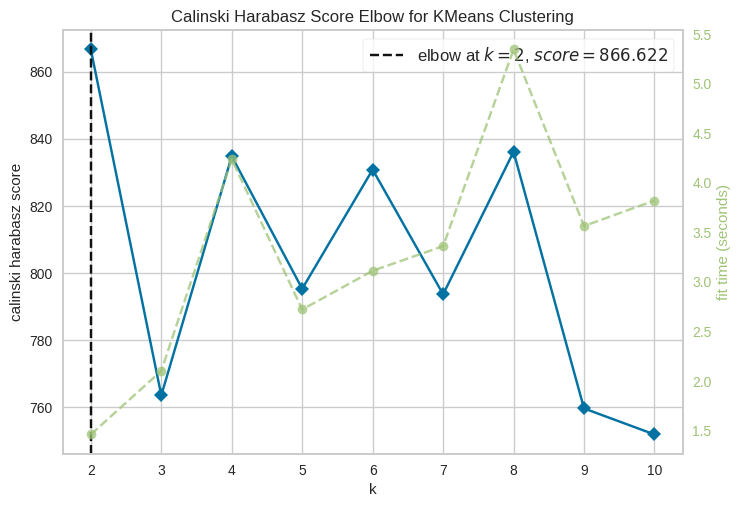

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz'
)

visualizer.fit(data_frame) # Fit the data to the visualizer
visualizer.show()       # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 2 The average silhouette_score is :  0.06002272208268315


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 3 The average silhouette_score is :  0.054817321846863526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 4 The average silhouette_score is :  0.05709577528441203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 5 The average silhouette_score is :  0.061158144291401116


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 6 The average silhouette_score is :  0.0547434946482813


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_cluster = 7 The average silhouette_score is :  0.05876439952343919


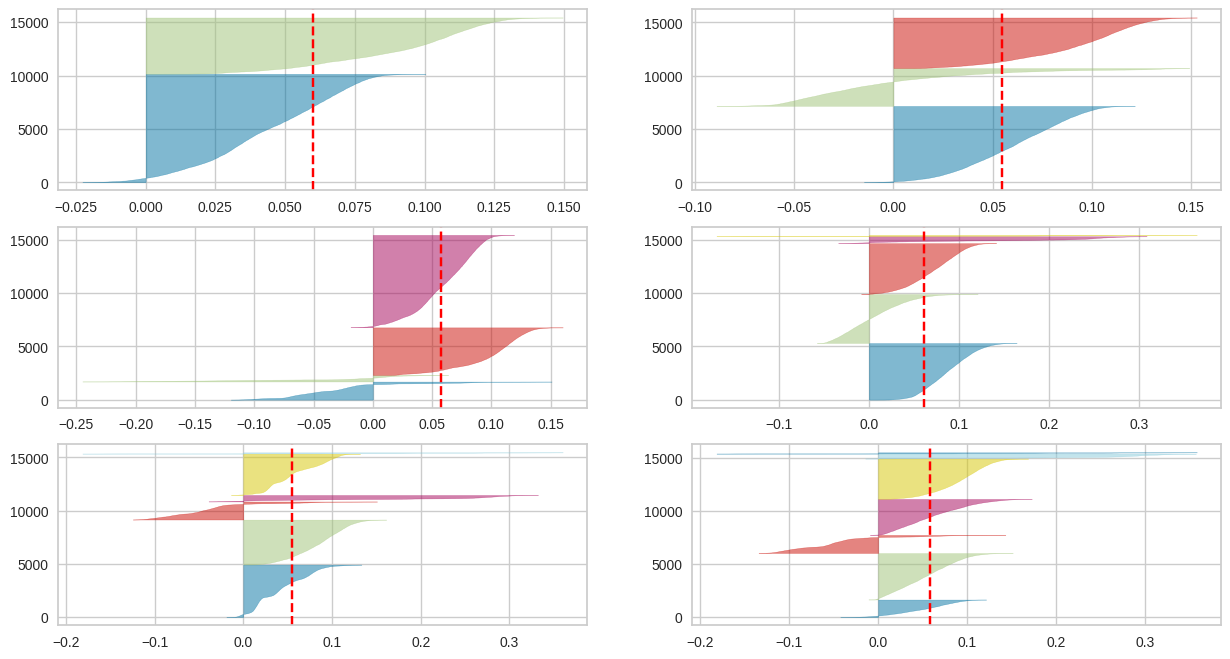

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_frame)
    print('For n_cluster = ' + str(i) + ' The average silhouette_score is : ', visualizer.silhouette_score_)

## Entire Data

In [212]:
kmeans = KMeans(n_clusters = number_of_cluster, init = 'k-means++', random_state = 0)
kmeans.fit(data_frame)
pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [213]:
silhouette = silhouette_score(data_frame, pred)
db_index = davies_bouldin_score(data_frame, pred)
ch_index = calinski_harabasz_score(data_frame, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.07
Davies-Bouldin Index: 2.41
Calinski-Harabasz Index: 836.14


In [214]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Entire Data

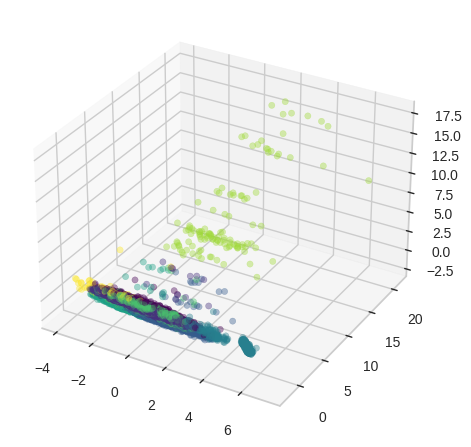

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

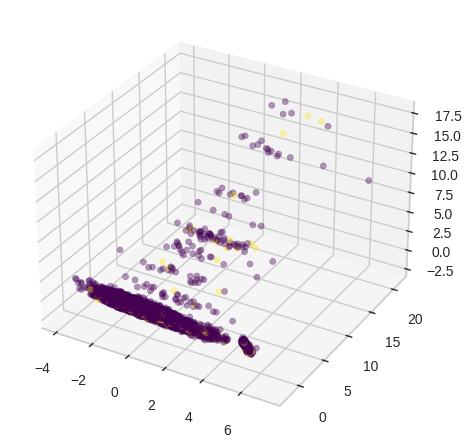

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=label_, cmap="viridis", alpha=0.4)
plt.show()

### 2D Entire Data

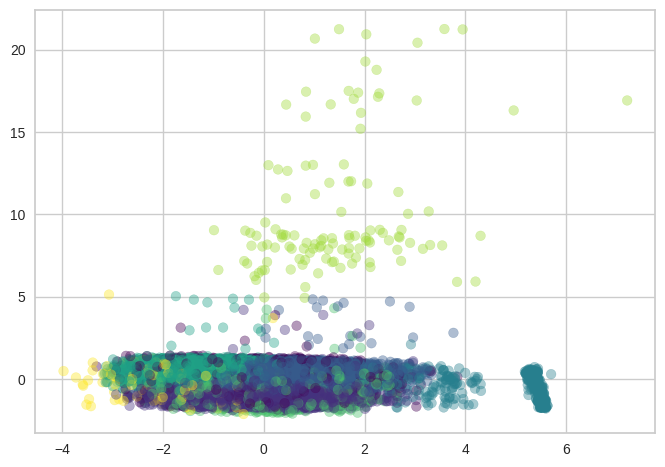

In [217]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

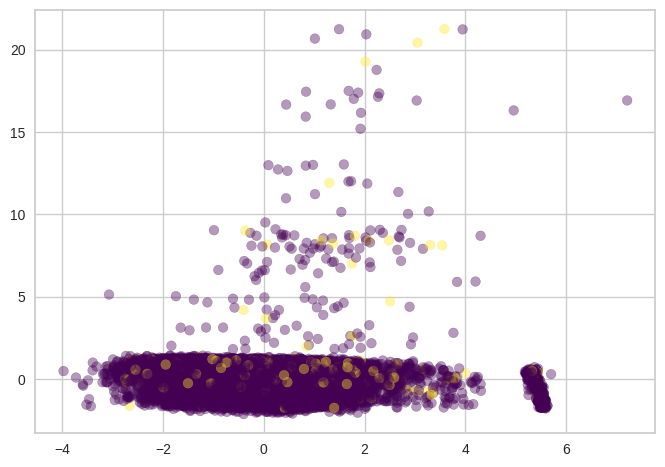

In [218]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=label_, cmap="viridis", alpha=0.4)
plt.show()

## Extracted Data using PCA

In [219]:
kmeans = KMeans(n_clusters = number_of_cluster, init = 'k-means++', random_state = 0)
kmeans.fit(reducted_data[:, : 30])
pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [220]:
silhouette = silhouette_score(reducted_data[:, :30], pred)
db_index = davies_bouldin_score(reducted_data[:, :30], pred)
ch_index = calinski_harabasz_score(reducted_data[:, :30], pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.08
Davies-Bouldin Index: 2.24
Calinski-Harabasz Index: 957.64


In [221]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Extracted Data

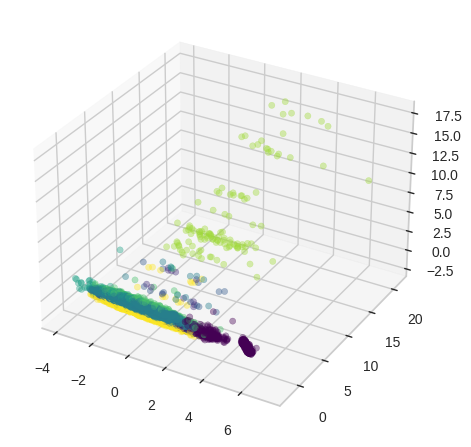

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Extracted Data

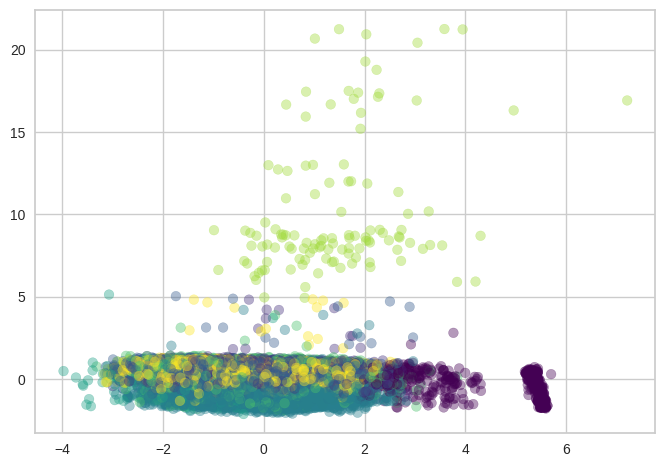

In [223]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Selected Data using Variance Threshold

In [224]:
kmeans = KMeans(n_clusters = number_of_cluster, init = 'k-means++', random_state = 0)
kmeans.fit(selected_data)
pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [225]:
silhouette = silhouette_score(selected_data, pred)
db_index = davies_bouldin_score(selected_data, pred)
ch_index = calinski_harabasz_score(selected_data, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.07
Davies-Bouldin Index: 2.29
Calinski-Harabasz Index: 945.89


In [226]:
label_ = np.where(label == "No", 1, 0)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Selected Data

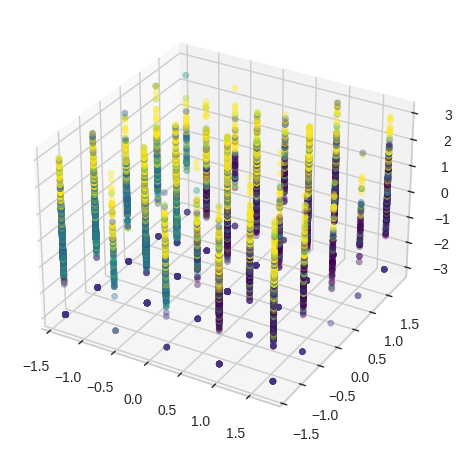

In [227]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data[:,0], selected_data[:,1], selected_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Selected Data

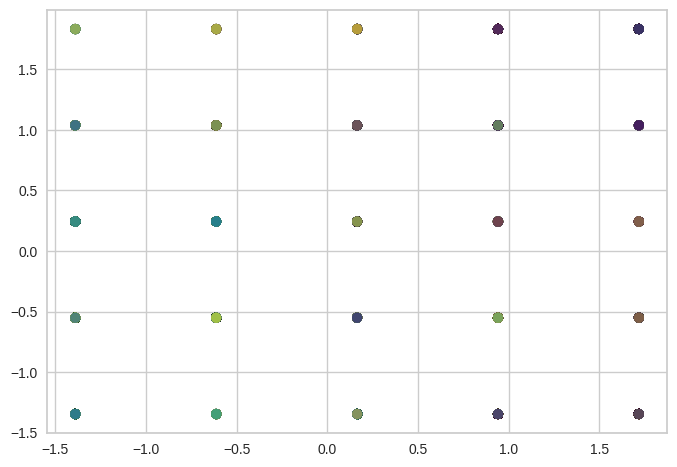

In [228]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(selected_data[:,0], selected_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

# GaussianMixture

In [247]:
from sklearn.mixture import GaussianMixture
import sklearn.metrics

number_of_cluster = 2
# number_of_cluster = 5
# number_of_cluster = 8

## Elbow

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    gm = GaussianMixture(n_components=i, random_state=0)
    gm.fit(data_frame)
    silhouette_scores.append(sklearn.metrics.silhouette_score(data_frame, gm.predict(data_frame)))

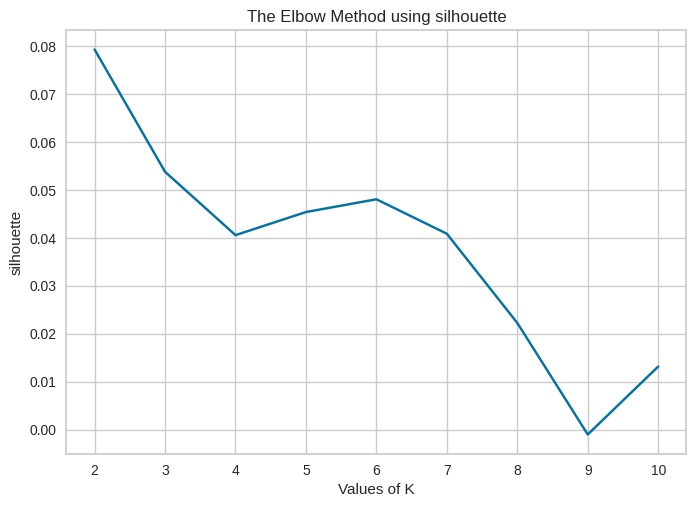

In [ ]:
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('The Elbow Method using silhouette')
plt.show()

## Entire Data

In [248]:
gm = GaussianMixture(n_components = number_of_cluster, random_state=0)
gm.fit(data_frame)
pred = gm.predict(data_frame)

In [249]:
silhouette = silhouette_score(data_frame, pred)
db_index = davies_bouldin_score(data_frame, pred)
ch_index = calinski_harabasz_score(data_frame, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.02
Davies-Bouldin Index: 4.59
Calinski-Harabasz Index: 374.04


In [250]:
label_ = np.where(label == "No", 1, 0)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Entire Data

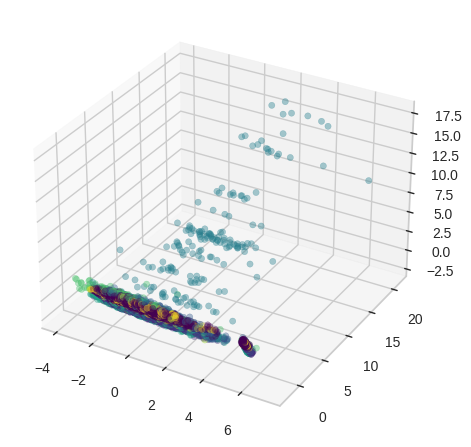

In [251]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

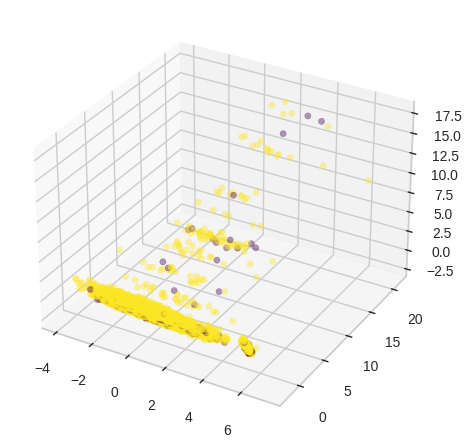

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=label_, cmap="viridis", alpha=0.4)
plt.show()

### 2D Entire Data

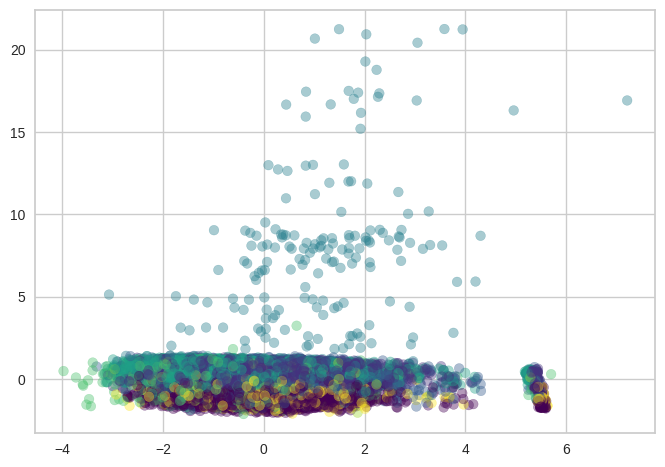

In [253]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

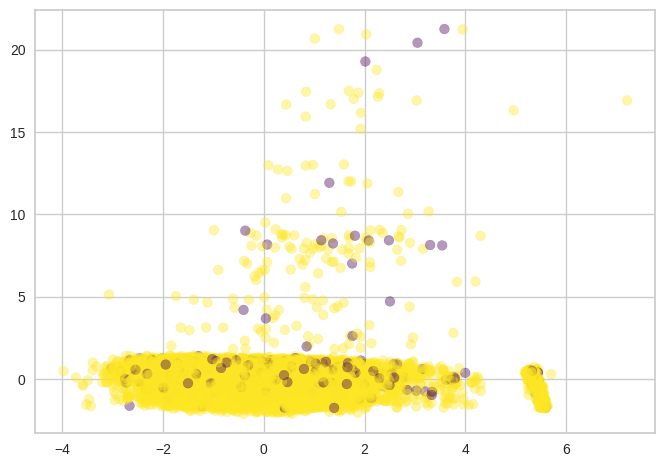

In [254]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=label_, cmap="viridis", alpha=0.4)
plt.show()

## Extracted Data using PCA

In [255]:
gm = GaussianMixture(n_components = number_of_cluster, random_state = 0)
gm.fit(reducted_data[:, : 30])
pred = gm.predict(reducted_data[:, : 30])

In [256]:
silhouette = silhouette_score(reducted_data[:, :30], pred)
db_index = davies_bouldin_score(reducted_data[:, :30], pred)
ch_index = calinski_harabasz_score(reducted_data[:, :30], pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.08
Davies-Bouldin Index: 2.31
Calinski-Harabasz Index: 783.53


In [257]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Extracted Data

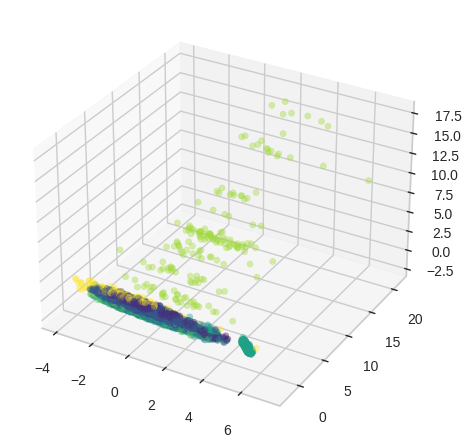

In [258]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Extracted Data

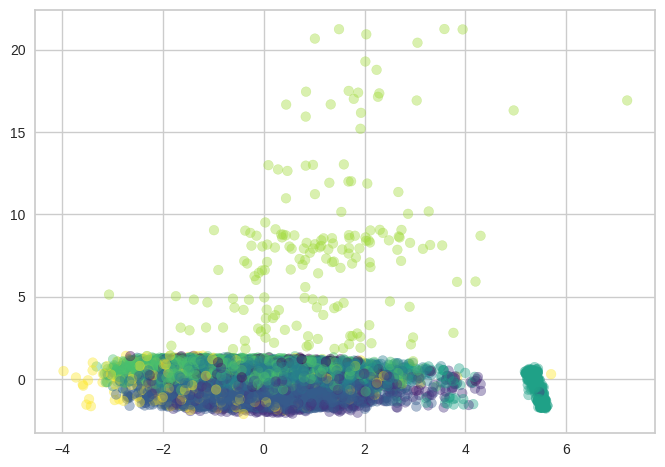

In [259]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Selected Data using Variance Threshold

In [260]:
gm = GaussianMixture(n_components = number_of_cluster, random_state = 0)
gm.fit(selected_data)
pred = gm.predict(selected_data)

In [261]:
silhouette = silhouette_score(selected_data, pred)
db_index = davies_bouldin_score(selected_data, pred)
ch_index = calinski_harabasz_score(selected_data, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.09
Davies-Bouldin Index: 2.14
Calinski-Harabasz Index: 707.85


In [262]:
label_ = np.where(label == "No", 1, 0)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Selected Data

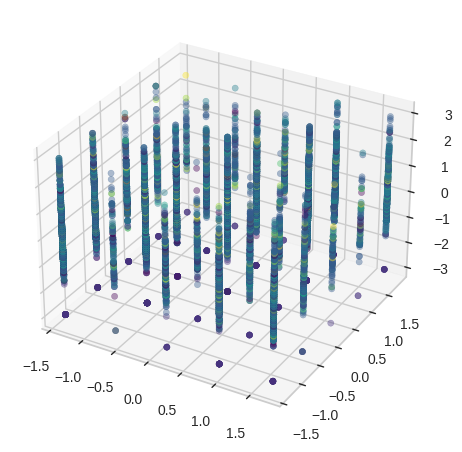

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data[:,0], selected_data[:,1], selected_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Selected Data

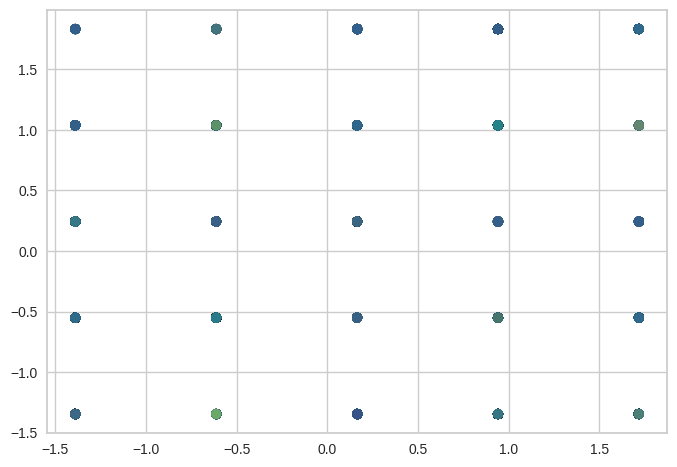

In [264]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(selected_data[:,0], selected_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

# SpectralClustering

In [ ]:
# from sklearn.cluster import SpectralClustering

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# # Instantiate the clustering model and visualizer
# model = SpectralClustering(affinity='nearest_neighbors', random_state=0)
# visualizer = KElbowVisualizer(
#     model, k=(2,11), metric='silhouette'
# )

# visualizer.fit(X_train)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# # Instantiate the clustering model and visualizer
# model = SpectralClustering(affinity='nearest_neighbors', random_state=0)
# visualizer = KElbowVisualizer(
#     model, k=(2,11), metric='silhouette'
# )

# visualizer.fit(X_train)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# # Instantiate the clustering model and visualizer
# model = SpectralClustering(affinity='nearest_neighbors', random_state=0)
# visualizer = KElbowVisualizer(
#     model, k=(2,11), metric='silhouette'
# )

# visualizer.fit(X_train)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
# model = SpectralClustering(n_clusters=2,
#          affinity='nearest_neighbors',
#          random_state=0)

# clustering = model.fit(X_train)
# labels = clustering.labels_

In [ ]:
# y_train_ = np.where(y_train == "No", 1, 0)

# print(classification_report(y_train_, labels))
# confusion_matrix(y_train_, labels)

In [ ]:
# from sklearn.neighbors import kneighbors_graph
# connectivity = kneighbors_graph(X=X_train, n_neighbors=10)

# adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)

# print(1)

# from scipy.sparse import csgraph
# graph_laplacian  = csgraph.laplacian(adjacency_matrix_s, normed=False)
# graph_laplacian = graph_laplacian.toarray()

# print(2)

# # find the eigenvalues and eigenvectors
# vals, vecs = np.linalg.eig(graph_laplacian)

# # sort
# vecs = vecs[:,np.argsort(vals)]
# vals = vals[np.argsort(vals)]

# print(3)

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(vecs[:,:3])
# labels = kmeans.labels_

# DBscan

In [ ]:
from sklearn.cluster import DBSCAN

eps_ = 15
min_samples_ = 20

## Entire Data

In [ ]:
clustering = DBSCAN(eps=eps_, min_samples=min_samples_)
clustering.fit(data_frame)
pred = clustering.labels_

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([15398,    22]))

In [ ]:
silhouette = silhouette_score(data_frame, pred)
db_index = davies_bouldin_score(data_frame, pred)
ch_index = calinski_harabasz_score(data_frame, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.76
Davies-Bouldin Index: 0.40
Calinski-Harabasz Index: 640.94


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.14      0.00      0.01       923

    accuracy                           0.94     15420
   macro avg       0.54      0.50      0.49     15420
weighted avg       0.89      0.94      0.91     15420



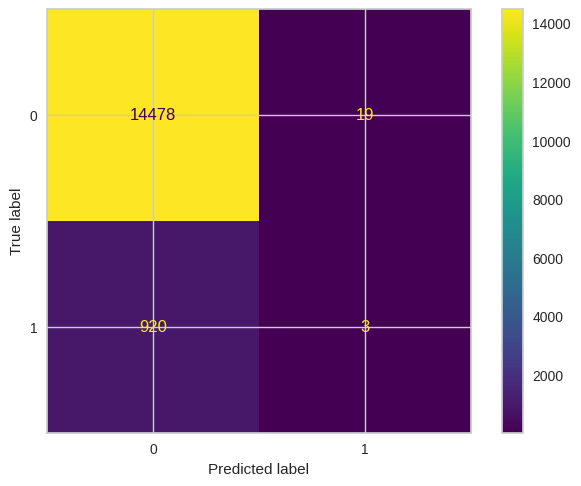

In [ ]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Entire Data

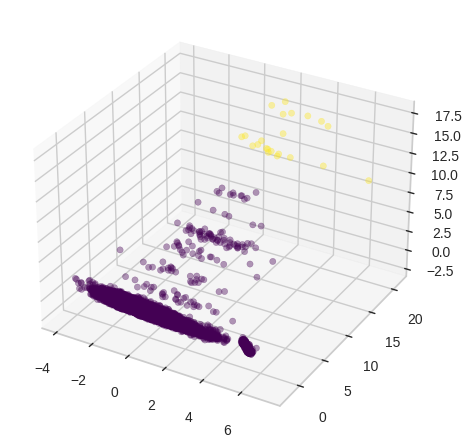

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

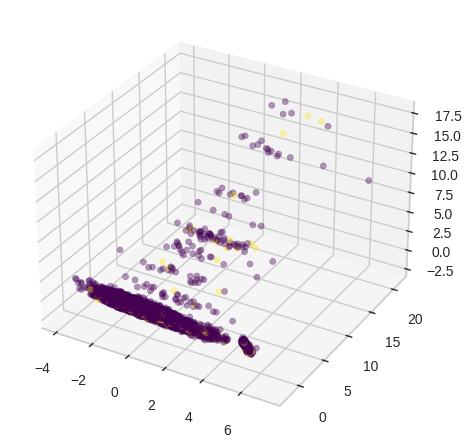

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=label_, cmap="viridis", alpha=0.4)
plt.show()

### 2D Entire Data

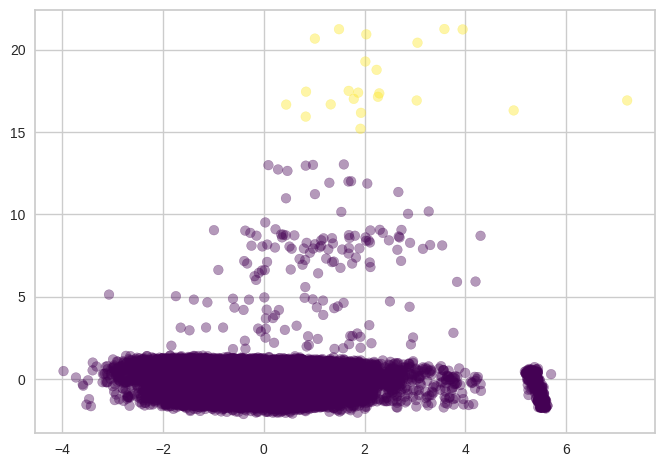

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

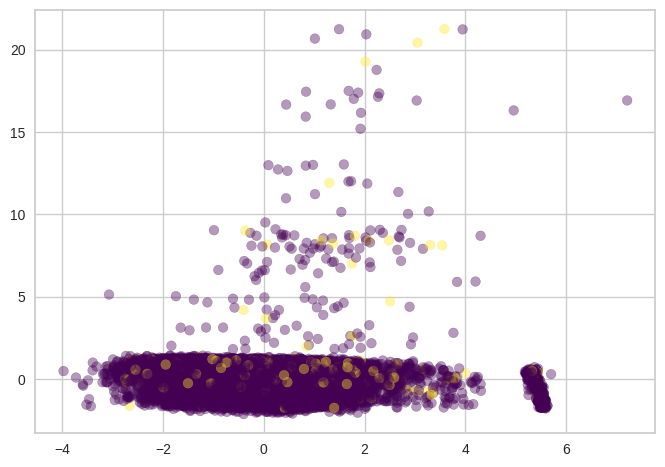

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=label_, cmap="viridis", alpha=0.4)
plt.show()

## Extracted Data using PCA

In [ ]:
clustering = DBSCAN(eps = eps_, min_samples = min_samples_)
clustering.fit(reducted_data[:,:30])
pred = clustering.labels_

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([15398,    22]))

In [ ]:
silhouette = silhouette_score(reducted_data[:,:30], pred)
db_index = davies_bouldin_score(reducted_data[:,:30], pred)
ch_index = calinski_harabasz_score(reducted_data[:,:30], pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.77
Davies-Bouldin Index: 0.38
Calinski-Harabasz Index: 734.12


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.14      0.00      0.01       923

    accuracy                           0.94     15420
   macro avg       0.54      0.50      0.49     15420
weighted avg       0.89      0.94      0.91     15420



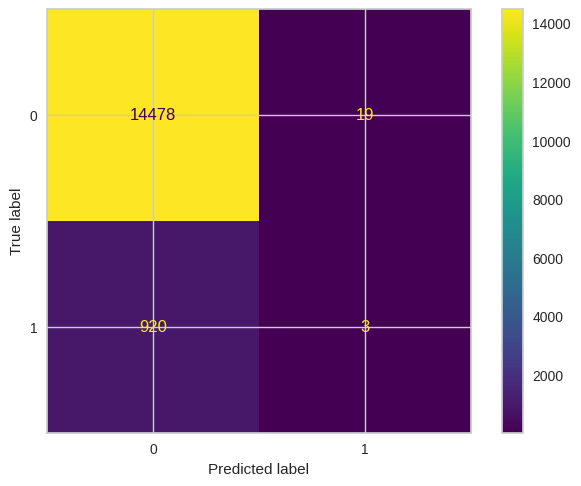

In [ ]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Extracted Data

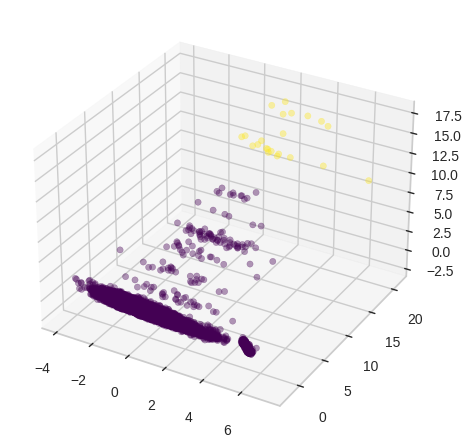

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Extracted Data

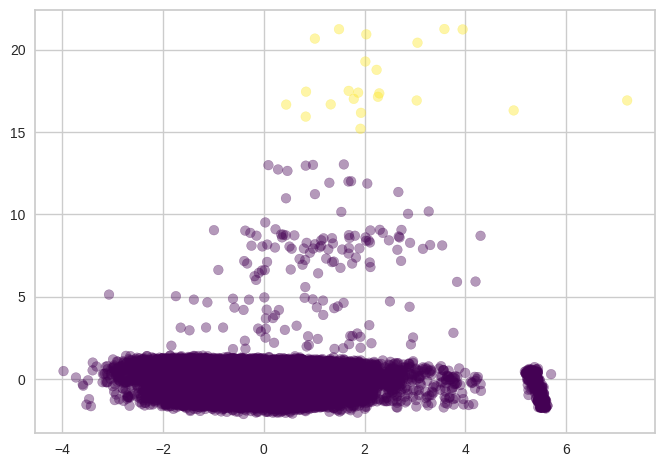

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Selected Data using Variance Threshold

In [ ]:
clustering = DBSCAN(eps = eps_, min_samples = min_samples_)
clustering.fit(selected_data)
pred = clustering.labels_

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([15398,    22]))

In [ ]:
silhouette = silhouette_score(selected_data, pred)
db_index = davies_bouldin_score(selected_data, pred)
ch_index = calinski_harabasz_score(selected_data, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.77
Davies-Bouldin Index: 0.38
Calinski-Harabasz Index: 721.07


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.14      0.00      0.01       923

    accuracy                           0.94     15420
   macro avg       0.54      0.50      0.49     15420
weighted avg       0.89      0.94      0.91     15420



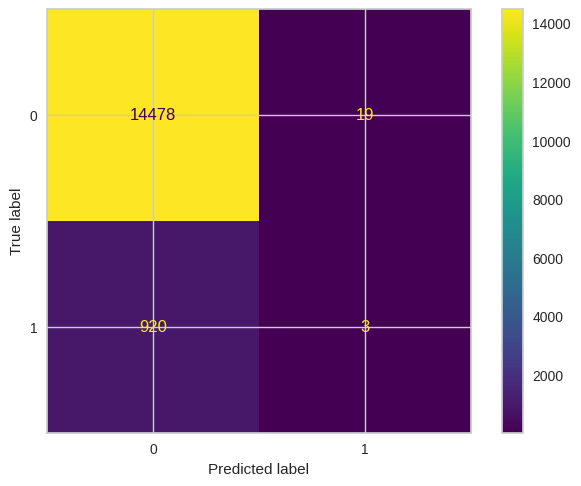

In [ ]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Selected Data

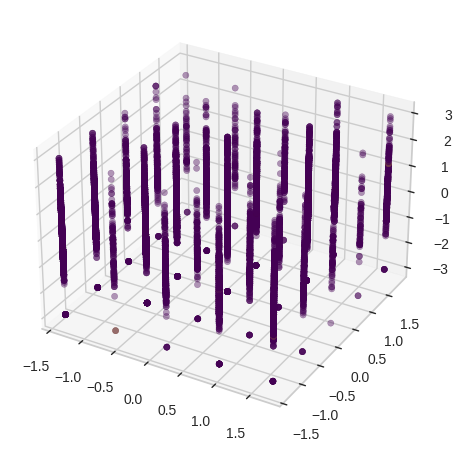

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data[:,0], selected_data[:,1], selected_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Selected Data

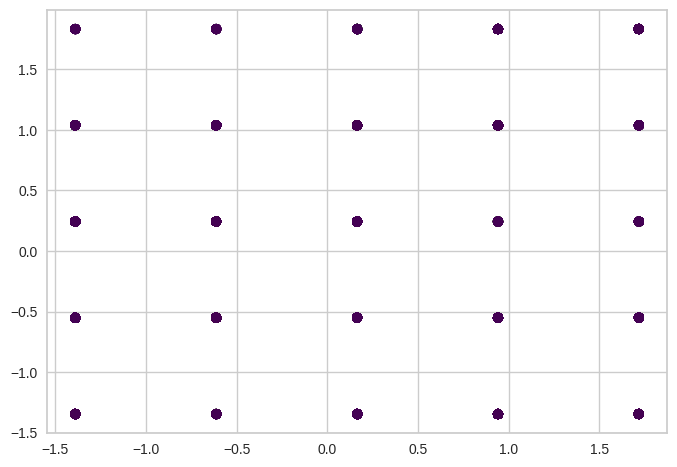

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(selected_data[:,0], selected_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

# Birch

In [283]:
from sklearn.cluster import Birch

number_of_cluster = 2
# number_of_cluster = 5
# number_of_cluster = 8

## Entire Data

In [284]:
brc = Birch(n_clusters = number_of_cluster)
brc.fit(data_frame)
pred = brc.predict(data_frame)

In [285]:
silhouette = silhouette_score(data_frame, pred)
db_index = davies_bouldin_score(data_frame, pred)
ch_index = calinski_harabasz_score(data_frame, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.08
Davies-Bouldin Index: 2.02
Calinski-Harabasz Index: 809.93


In [286]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Entire Data

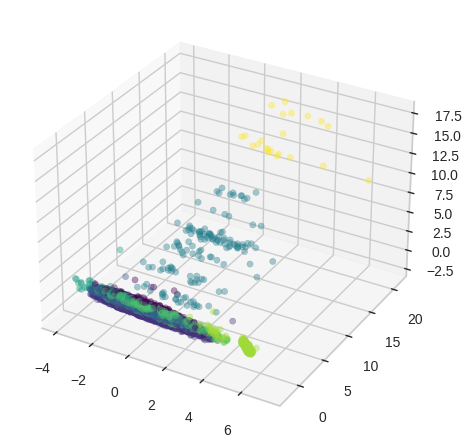

In [287]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

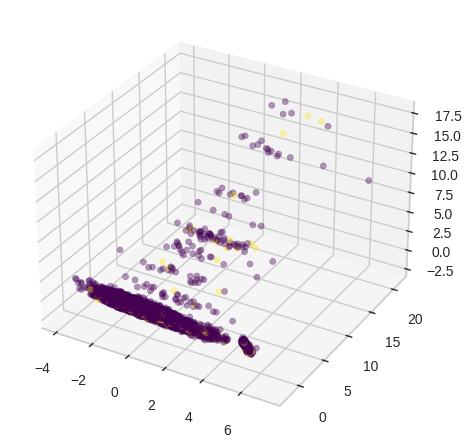

In [288]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=label_, cmap="viridis", alpha=0.4)
plt.show()

### 2D Entire Data

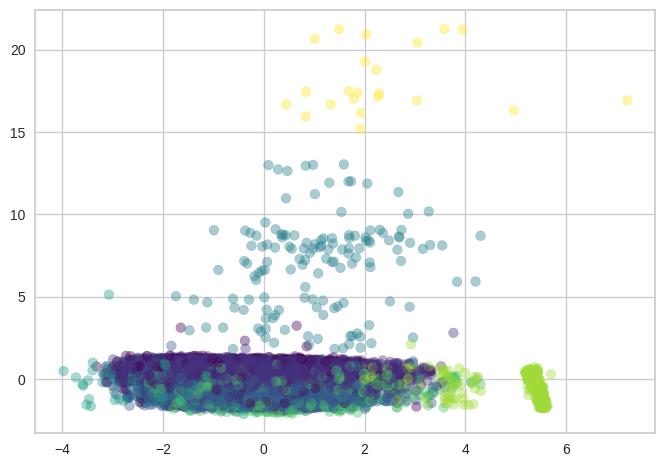

In [289]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

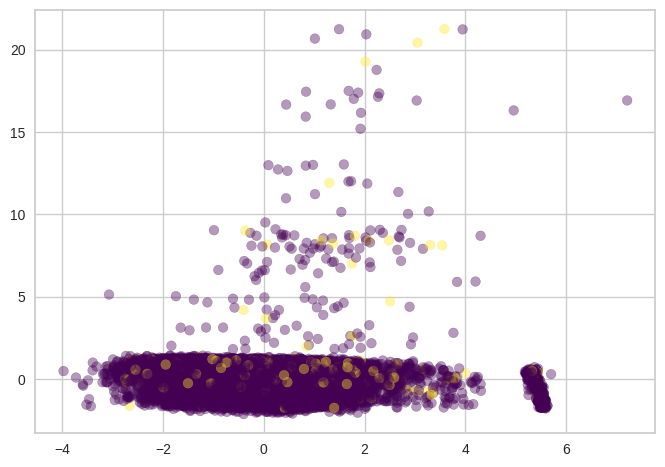

In [290]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=label_, cmap="viridis", alpha=0.4)
plt.show()

## Extracted Data using PCA

In [291]:
brc = Birch(n_clusters = number_of_cluster)
brc.fit(reducted_data[:,:30])
pred = brc.predict(reducted_data[:,:30])

In [292]:
silhouette = silhouette_score(reducted_data[:,:30], pred)
db_index = davies_bouldin_score(reducted_data[:,:30], pred)
ch_index = calinski_harabasz_score(reducted_data[:,:30], pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.10
Davies-Bouldin Index: 1.85
Calinski-Harabasz Index: 976.63


In [293]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Extracted Data

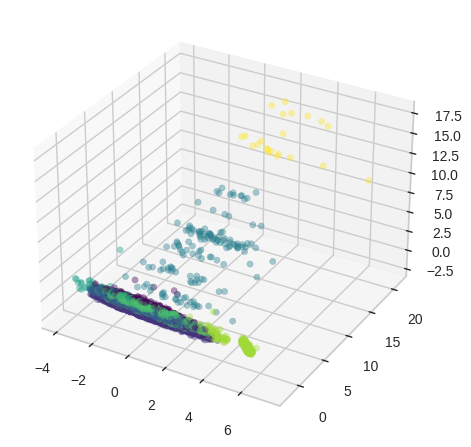

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Extracted Data

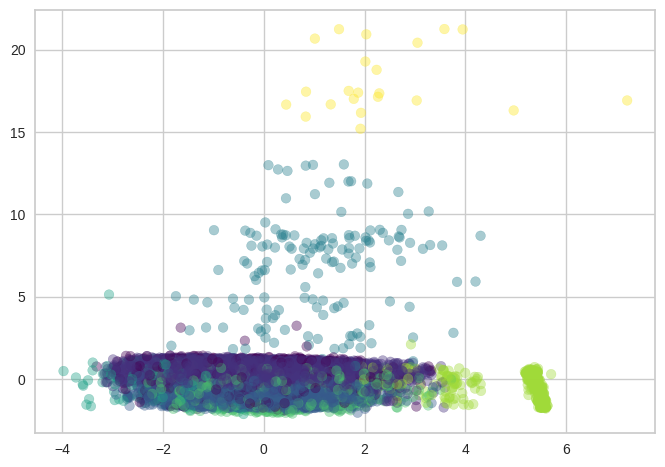

In [295]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Selected Data using Variance Threshold

In [296]:
brc = Birch(n_clusters = number_of_cluster)
brc.fit(selected_data)
pred = brc.predict(selected_data)

In [297]:
silhouette = silhouette_score(selected_data, pred)
db_index = davies_bouldin_score(selected_data, pred)
ch_index = calinski_harabasz_score(selected_data, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.10
Davies-Bouldin Index: 1.87
Calinski-Harabasz Index: 951.66


In [298]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Selected Data

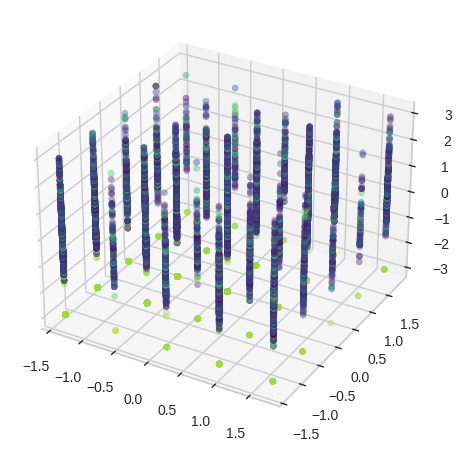

In [299]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data[:,0], selected_data[:,1], selected_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Selected Data

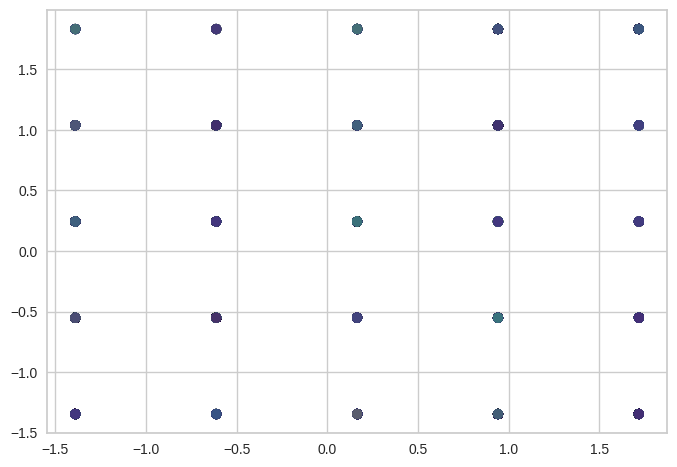

In [300]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(selected_data[:,0], selected_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

# OPTICS

In [321]:
from sklearn.cluster import OPTICS

min_samples_ = 50
# min_samples_ = 25
# min_samples_ = 5

## Entire Data

In [322]:
clustering = OPTICS(min_samples = min_samples_)
clustering.fit(data_frame)
pred = clustering.labels_

In [323]:
silhouette = silhouette_score(data_frame, pred)
db_index = davies_bouldin_score(data_frame, pred)
ch_index = calinski_harabasz_score(data_frame, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.60
Davies-Bouldin Index: 1.13
Calinski-Harabasz Index: 884.65


In [324]:
np.unique(pred, return_counts=True)

(array([-1,  0]), array([  125, 15295]))

In [325]:
# pred_2 = np.copy(pred)

# pred_2[pred_2 == 0] = 0

# pred_2[pred_2 == -1] = 1
# pred_2[pred_2 == 1] = 1
# pred_2[pred_2 == 2] = 1
# pred_2[pred_2 == 3] = 1
# pred_2[pred_2 == 4] = 1

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.99      0.97     14497
           1       0.00      0.00      0.00       923

    accuracy                           0.93     15420
   macro avg       0.31      0.33      0.32     15420
weighted avg       0.88      0.93      0.91     15420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

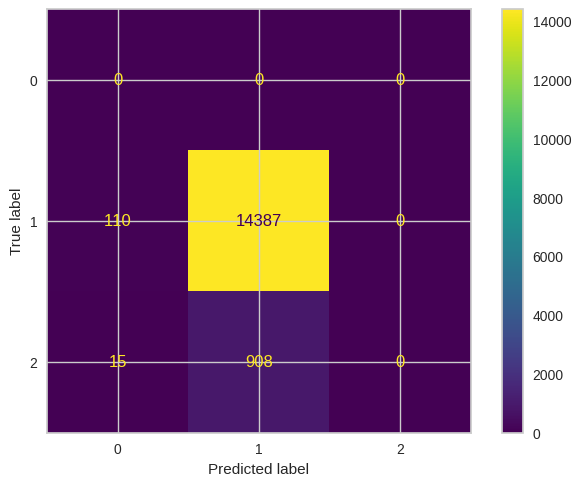

In [326]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Entire Data

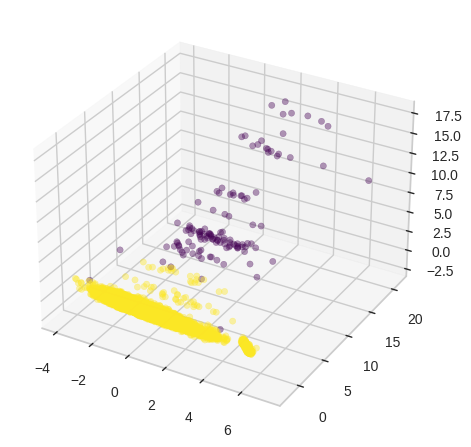

In [327]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Entire Data

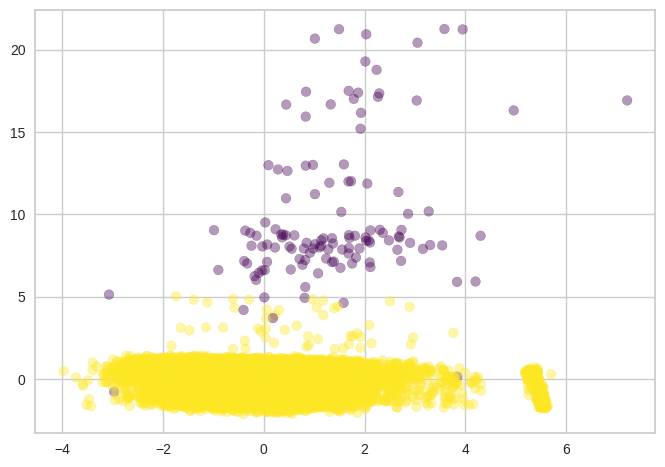

In [328]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Extracted Data using PCA

In [329]:
clustering = OPTICS(min_samples = min_samples_)
clustering.fit(reducted_data[:, :30])
pred = clustering.labels_

In [330]:
silhouette = silhouette_score(reducted_data[:, :30], pred)
db_index = davies_bouldin_score(reducted_data[:, :30], pred)
ch_index = calinski_harabasz_score(reducted_data[:, :30], pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.34
Davies-Bouldin Index: 1.15
Calinski-Harabasz Index: 713.92


In [331]:
np.unique(pred, return_counts=True)

(array([-1,  0]), array([15125,   295]))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.02      0.04     14497
           1       0.00      0.00      0.00       923

    accuracy                           0.02     15420
   macro avg       0.31      0.01      0.01     15420
weighted avg       0.89      0.02      0.04     15420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

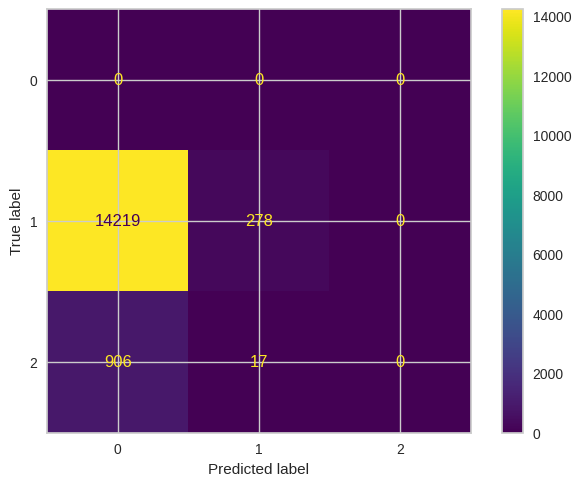

In [332]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Extracted Data

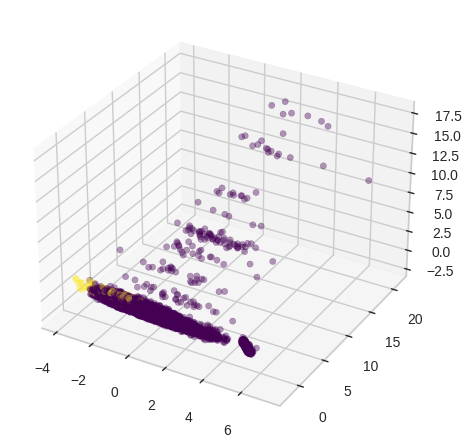

In [333]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reducted_data[:,0], reducted_data[:,1], reducted_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Extracted Data

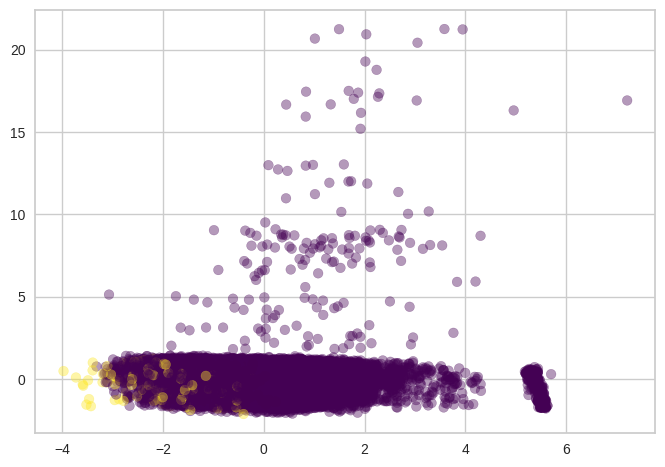

In [334]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reducted_data[:,0], reducted_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()

## Selected Data using Variance Threshold

In [335]:
clustering = OPTICS(min_samples = min_samples_)
clustering.fit(selected_data)
pred = clustering.labels_

In [336]:
silhouette = silhouette_score(selected_data, pred)
db_index = davies_bouldin_score(selected_data, pred)
ch_index = calinski_harabasz_score(selected_data, pred)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.34
Davies-Bouldin Index: 1.16
Calinski-Harabasz Index: 703.69


In [337]:
np.unique(pred, return_counts=True)

(array([-1,  0]), array([15124,   296]))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.02      0.04     14497
           1       0.00      0.00      0.00       923

    accuracy                           0.02     15420
   macro avg       0.31      0.01      0.01     15420
weighted avg       0.89      0.02      0.04     15420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

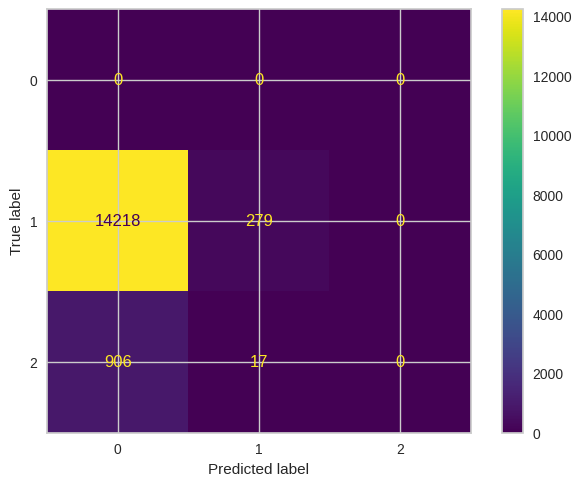

In [338]:
label_ = np.where(label == "No", 0, 1)

if (len(np.unique(pred, return_counts=True)[0]) == 2):
    print(classification_report(label_, pred))
    confusion_matrix(label_, pred)
    cm = confusion_matrix(label_, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### 3D Selected Data

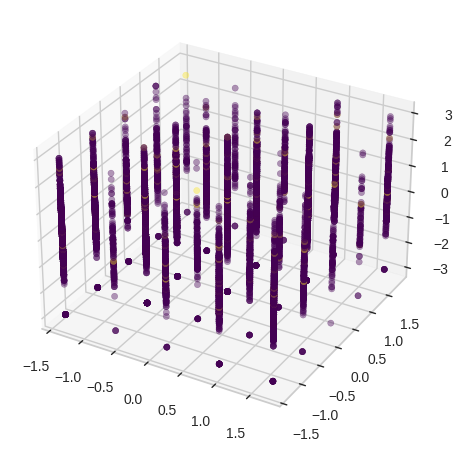

In [339]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data[:,0], selected_data[:,1], selected_data[:,2], c=pred, cmap="viridis", alpha=0.4)
plt.show()

### 2D Selected Data

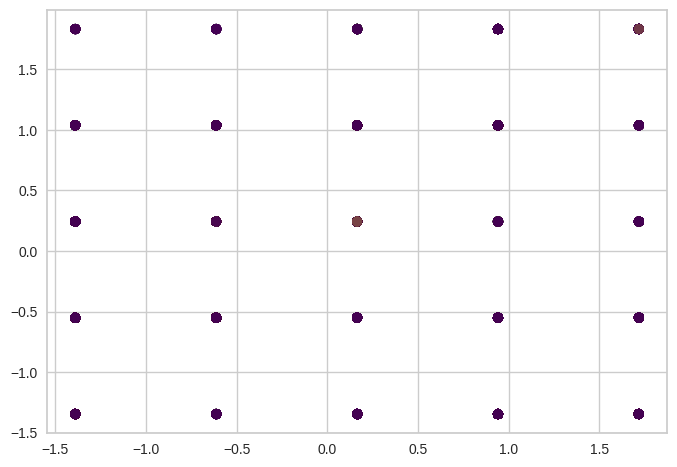

In [340]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(selected_data[:,0], selected_data[:,1], c=pred, cmap="viridis", alpha=0.4)
plt.show()